In [276]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [277]:
#Loading training Dataset
train = pd.read_csv('C:/Users/rvaish/Documents/Python Scripts/MachineLearningPython-HousePriceCompetition/Data/HousePricingTutorial_train.csv')

In [278]:
#Loading testing Dataset
test = pd.read_csv('C:/Users/rvaish/Documents/Python Scripts/MachineLearningPython-HousePriceCompetition/Data/HousePricingTutorial_test.csv')

In [279]:
##The meaning of all the columns are...



##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access
##LotShape: General shape of property
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

In [280]:
#Shape of train  data
print(train.shape)
print(test.shape)

(1443, 81)
(17, 80)


Skew is: 0.12004842292003634


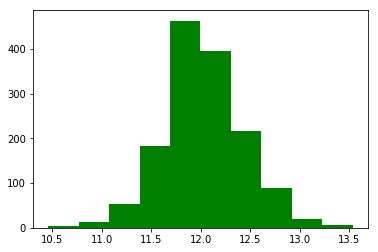

In [281]:
train['SalePrice'] = np.log1p(train['SalePrice'])

target = train['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [282]:
#Finding all the Numerical columns
numeric_features = train.select_dtypes(include=[np.number])

In [283]:
#Finding the first five features that are most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817339
GrLivArea      0.700460
GarageCars     0.680535
GarageArea     0.650589
Name: SalePrice, dtype: float64 



In [284]:
#Understanding NULL values and sorting them !
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1436
MiscFeature      1390
Alley            1353
Fence            1165
FireplaceQu       679
LotFrontage       257
GarageCond         78
GarageType         78
GarageYrBlt        78
GarageFinish       78
GarageQual         78
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [285]:
#Examining the NULL values and filling with appropriate values:
#There are 19 columns with NULLs.

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')




test['PoolQC'] = test['PoolQC'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [286]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(int(0))
train['GarageArea'] = train['GarageArea'].fillna(int(0))
train['GarageCars'] = train['GarageCars'].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))


test['GarageYrBlt'] = test['GarageYrBlt'].fillna(int(0))
test['GarageArea'] = test['GarageArea'].fillna(int(0))
test['GarageCars'] = test['GarageCars'].fillna(int(0))
test['MasVnrArea'] = test['MasVnrArea'].fillna(int(0))

In [287]:
#########################################################################################################

In [288]:
#Can Experiment-
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [289]:
#Can Experiment-
#train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [290]:
train['LotFrontage'] = train['LotFrontage'].fillna(int(0))
train['Electrical'] = train['Electrical'].fillna(int (0))

test['LotFrontage'] = test['LotFrontage'].fillna(int(0))
test['Electrical'] = test['Electrical'].fillna(int (0))

In [291]:
#########################################################################################################

In [292]:
#The total number of columns = 81
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [293]:
#Total columns in train:
print(len(train.columns))
#Total columns in test:
print(len(test.columns))

81
80


In [294]:
#Numerical Columns in train = 38
print(len(train.select_dtypes(include=[np.number]).columns.tolist()))

#Numerical Columns in test = 37
print(len(test.select_dtypes(include=[np.number]).columns.tolist()))

38
37


In [295]:
#Non-Numerical Columns in train = 43
print(len(train.select_dtypes(exclude=[np.number]).columns.tolist()))

#Non-Numerical Columns in test = 43
print(len(test.select_dtypes(exclude=[np.number]).columns.tolist()))

43
43


In [296]:
#Train = 43+38 = 81
#Test = 43+37 =80

In [297]:
nonNumColumns = train.select_dtypes(exclude=[np.number]).columns.tolist();

In [301]:
len(nonNumColumns)

43

In [302]:
nonNumColumnss = test.select_dtypes(exclude=[np.number]).columns.tolist();

In [303]:
len(nonNumColumnss)

43

In [298]:
#Converting  Dataframe(train)  ---> Numerical + NonNumerical + Sparse
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in nonNumColumns:
    test = create_dummies(test,column)  
    train = create_dummies(train,column)

In [300]:
print(test.shape)
print(train.shape)

(17, 210)
(1443, 348)


In [248]:
#Checking now....
print(list(train.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [249]:
print(list(test.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [154]:
#Just checking.....
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
7,8,60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


In [155]:
train.to_csv('C:/Users/rvaish/Documents/Python Scripts/MachineLearningPython-HousePriceCompetition/SP/train.csv');
test.to_csv('C:/Users/rvaish/Documents/Python Scripts/MachineLearningPython-HousePriceCompetition/SP/test.csv');



In [156]:
#CO-RELATION BETWEEN NUMERICS IS FOUND
#NULL FILLED
#NON-NUMERIC IS CONVERTED
#TIME TO APPLY MODEL

In [157]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

In [158]:
model = linear_model.LinearRegression()

In [159]:
#I picked up quality + Co-realation variables.
selectdColumns =  ['OverallQual','OverallCond','ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex','ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA','BsmtQual_TA','BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA','BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA','BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf','BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA','LowQualFinSF',
                 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA','FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None', 'FireplaceQu_Po', 'FireplaceQu_TA','GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA','GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None','MiscFeature_Gar2', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC','MoSold','YrSold','SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD','SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
                 'OverallQual','GrLivArea','GarageCars','GarageArea']

In [160]:
model.fit(train[selectdColumns], train["SalePrice"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
all_X = train[selectdColumns]
all_y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)

[11.67350385 12.71512943 11.78958672 12.26745257 12.66736856 11.58325377
 12.07515196 11.25316639 12.13312755 12.22590478 12.32857975 12.57003212
 11.21154035 11.6390215  11.82513684 11.49521893 12.20848904 11.68083631
 11.89234515 11.53082545 12.55787337 12.44898496 11.85121331 11.90313321
 11.36856001 11.82740615 11.68214226 12.12201211 12.36013529 12.02179738
 12.2964249  12.12660982 11.69264015 11.68096322 11.55748451 12.35683699
 11.92403922 12.82168252 11.85239224 12.03753232 11.96103921 11.88594119
 11.96325391 11.63023133 12.59323685 12.0055695  12.09089961 11.90880164
 11.69533869 12.48340582 11.82503145 12.10792663 12.94356316 12.18972661
 12.2357299  11.98114968 12.30721878 12.21098855 12.41789158 11.82298529
 11.75326733 12.49010203 11.76693711 10.65052555 11.97818834 11.75133743
 11.99882153 11.96855325 11.74431203 12.33594931 12.05451777 11.80426594
 12.28676797 12.11385195 12.16342816 12.11400061 12.11882722 11.65332869
 11.72964145 11.98885743 12.31447409 11.89060772 12

In [162]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print('----')
print(accuracy)

[0.56763825 0.77354514 0.81670739 0.83086195 0.83091288 0.83464843
 0.85059735 0.85837683 0.87701115 0.88269929]
----
0.8122998661431126


In [163]:
############  NOW TIME TO USE UNSEEN DATA #################

In [172]:
print(len(selectdColumns))

99


In [173]:
print(len(list(train.columns)))

348


In [165]:
print(len(test[selectdColumns]))

KeyError: "['ExterQual_Fa' 'ExterCond_Ex' 'ExterCond_Fa' 'ExterCond_Po' 'BsmtQual_Ex'\n 'BsmtQual_None' 'BsmtCond_Fa' 'BsmtCond_None' 'BsmtCond_Po'\n 'BsmtFinType1_None' 'BsmtFinType2_ALQ' 'BsmtFinType2_BLQ'\n 'BsmtFinType2_GLQ' 'BsmtFinType2_None' 'HeatingQC_Po' 'FireplaceQu_Ex'\n 'FireplaceQu_Fa' 'FireplaceQu_Po' 'GarageQual_Ex' 'GarageQual_Gd'\n 'GarageQual_Po' 'GarageCond_Ex' 'GarageCond_Fa' 'GarageCond_Gd'\n 'PoolQC_Ex' 'PoolQC_Fa' 'PoolQC_Gd' 'Fence_MnWw' 'MiscFeature_Gar2'\n 'MiscFeature_Othr' 'MiscFeature_TenC' 'SaleType_COD' 'SaleType_CWD'\n 'SaleType_Con' 'SaleType_ConLD' 'SaleType_ConLI' 'SaleType_ConLw'\n 'SaleType_Oth' 'SaleCondition_AdjLand' 'SaleCondition_Alloca'\n 'SaleCondition_Family'] not in index"

In [112]:
predictions =model.predict(test[selectdColumns])

KeyError: "['ExterQual_Fa' 'ExterCond_Ex' 'ExterCond_Fa' 'ExterCond_Po' 'BsmtQual_Ex'\n 'BsmtQual_None' 'BsmtCond_Fa' 'BsmtCond_None' 'BsmtCond_Po'\n 'BsmtFinType1_None' 'BsmtFinType2_ALQ' 'BsmtFinType2_BLQ'\n 'BsmtFinType2_GLQ' 'BsmtFinType2_None' 'HeatingQC_Po' 'FireplaceQu_Ex'\n 'FireplaceQu_Fa' 'FireplaceQu_Po' 'GarageQual_Ex' 'GarageQual_Gd'\n 'GarageQual_Po' 'GarageCond_Ex' 'GarageCond_Fa' 'GarageCond_Gd'\n 'PoolQC_Ex' 'PoolQC_Fa' 'PoolQC_Gd' 'Fence_MnWw' 'MiscFeature_Gar2'\n 'MiscFeature_Othr' 'MiscFeature_TenC' 'SaleType_COD' 'SaleType_CWD'\n 'SaleType_Con' 'SaleType_ConLD' 'SaleType_ConLI' 'SaleType_ConLw'\n 'SaleType_Oth' 'SaleCondition_AdjLand' 'SaleCondition_Alloca'\n 'SaleCondition_Family'] not in index"

In [45]:
print(predictions)

[12.25615335 12.156142   12.34909368]


In [46]:
# The above value means in $ as:

In [47]:
realvalues = np.expm1(predictions)
print(realvalues)

[210270.18738659 190258.07907214 230749.81299098]


In [124]:
#The 'actual cost' versus the 'predicted value's':

In [125]:
#ACTUAL = 208500
#DUMMY = 210270
#ENCODER = 213273.94110526

#PREDICTED = 213273.94110526


#ACTUAL = 147500
#PREDICTED = 132910.96344037

In [126]:
#THE END